<a href="https://colab.research.google.com/github/Najdawiali/Arabot-projects/blob/main/Amazon_Stock_Data_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the Amazon Stock Market dataset I worked with 6321 rows and 7 columns to predict the number of shares traded on that day.
This dataset includes various features that influence stock trading, by analyzing this data, the goal is to build predictive models that can help in understanding stock trends and market behaviors.



In [168]:
#URL: https://www.kaggle.com/datasets/abdulmoiz12/amazon-stock-data-2025/data

In [169]:
pip install kaggle

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
import os
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

In [172]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [173]:
!chmod 600 ~/.kaggle/kaggle.json

In [174]:
!kaggle datasets download -d abdulmoiz12/amazon-stock-data-2025

Dataset URL: https://www.kaggle.com/datasets/abdulmoiz12/amazon-stock-data-2025
License(s): CC0-1.0


In [175]:
!unzip amazon-stock-data-2025.zip

Archive:  amazon-stock-data-2025.zip
  inflating: Amazon stock data 2000-2025.csv  


In [176]:
pip install tensorflow

In [177]:
!pip install pandas_market_calendars

In [178]:
import pandas as pd
import pandas_market_calendars as mcal #To check in which days stock exchange is opened
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [179]:
df = pd.read_csv('Amazon stock data 2000-2025.csv')
df.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-03 00:00:00-05:00,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04 00:00:00-05:00,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05 00:00:00-05:00,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
3,2000-01-06 00:00:00-05:00,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
4,2000-01-07 00:00:00-05:00,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


In [180]:
df.shape

(6321, 7)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6321 non-null   object 
 1   open       6321 non-null   float64
 2   high       6321 non-null   float64
 3   low        6321 non-null   float64
 4   close      6321 non-null   float64
 5   adj_close  6321 non-null   float64
 6   volume     6321 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 345.8+ KB


In [182]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [183]:
df.describe()

,open,high,low,close,adj_close,volume
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6.321000e+03
mean,44.736023,45.251977,44.176568,44.729400,44.729400,1.180771e+08
std,59.578629,60.241809,58.852822,59.562415,59.562415,9.758263e+07
min,0.295500,0.305000,0.275500,0.298500,0.298500,1.500750e+07
25%,2.363500,2.415500,2.306000,2.364000,2.364000,6.215930e+07
50%,11.602000,11.737500,11.420000,11.595000,11.595000,9.595200e+07
75%,85.140503,85.779999,83.903000,84.817497,84.817497,1.433920e+08
max,239.020004,242.520004,238.029999,242.059998,242.059998,2.086584e+09


In [184]:
#I noticed each of close column and adj_close column are exactly same

In [185]:
df.drop('adj_close',axis=1,inplace=True)# So I dropped the adj_close column to avoid the overfitting

In [215]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
df['date'] = df['date'].dt.tz_localize(None)

# Get official Amazon Stock Exchange market calendar
nasdaq = mcal.get_calendar('NASDAQ')# Amazon's stock is traded on the Nasdaq stock exchange

for year in range(2000, 2026):
    # Get expected trading days for ASE (excluding weekends & holidays)
    expected_days = nasdaq.valid_days(start_date=f"{year}-01-01", end_date=f"{year}-12-31")
    expected_days = set(pd.to_datetime(expected_days))
    actual_days = set(df[df['date'].dt.year == year]['date'].dt.date)
    expected_days = {d.date() for d in expected_days}

    # Find missing trading days
    missing_days = expected_days - actual_days

    print(f"Year {year}: {len(actual_days)} trading days recorded (Expected: {len(expected_days)})")
    if missing_days:
        print(f"  -> Missing {len(missing_days)} trading days: {sorted(missing_days)}")

Year 2000: 252 trading days recorded (Expected: 252)
Year 2001: 248 trading days recorded (Expected: 248)
Year 2002: 252 trading days recorded (Expected: 252)
Year 2003: 252 trading days recorded (Expected: 252)
Year 2004: 252 trading days recorded (Expected: 252)
Year 2005: 252 trading days recorded (Expected: 252)
Year 2006: 251 trading days recorded (Expected: 251)
Year 2007: 251 trading days recorded (Expected: 251)
Year 2008: 253 trading days recorded (Expected: 253)
Year 2009: 252 trading days recorded (Expected: 252)
Year 2010: 252 trading days recorded (Expected: 252)
Year 2011: 252 trading days recorded (Expected: 252)
Year 2012: 250 trading days recorded (Expected: 250)
Year 2013: 252 trading days recorded (Expected: 252)
Year 2014: 252 trading days recorded (Expected: 252)
Year 2015: 252 trading days recorded (Expected: 252)
Year 2016: 252 trading days recorded (Expected: 252)
Year 2017: 251 trading days recorded (Expected: 251)
Year 2018: 251 trading days recorded (Expected

In [187]:
df.tail(10)

,date,open,high,low,close,volume
6311,2025-02-05 05:00:00,237.020004,238.320007,235.199997,236.169998,38727300
6312,2025-02-06 05:00:00,238.009995,239.660004,236.009995,238.830002,60897100
6313,2025-02-07 05:00:00,232.500000,234.809998,228.059998,229.149994,77539300
6314,2025-02-10 05:00:00,230.550003,233.919998,229.199997,233.139999,35419900
6315,2025-02-11 05:00:00,231.919998,233.440002,230.130005,232.759995,23713700
6316,2025-02-12 05:00:00,230.460007,231.179993,228.160004,228.929993,32285200
6317,2025-02-13 05:00:00,228.850006,230.419998,227.520004,230.369995,31346500
6318,2025-02-14 05:00:00,229.199997,229.889999,227.229996,228.679993,27031100
6319,2025-02-18 05:00:00,228.820007,229.300003,223.720001,226.649994,42975100
6320,2025-02-19 05:00:00,225.520004,226.830002,223.710007,226.630005,28566700


In [188]:
# Amazon Stock Market begin in this dataset from 01-01-2000 to 19-02-2025

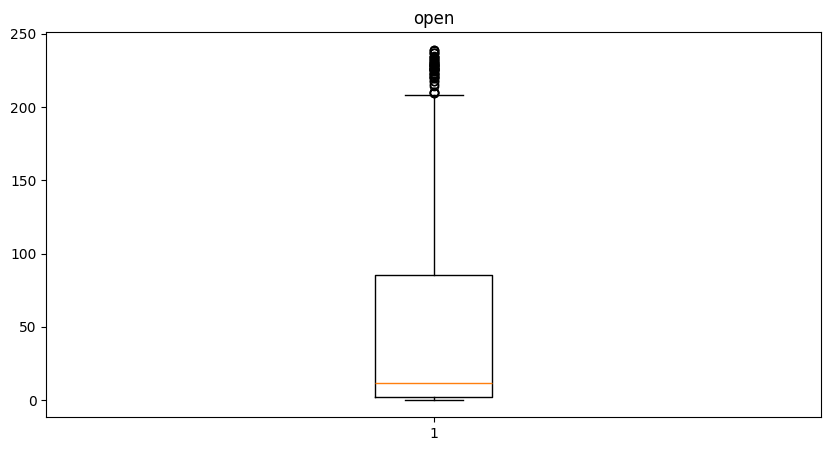

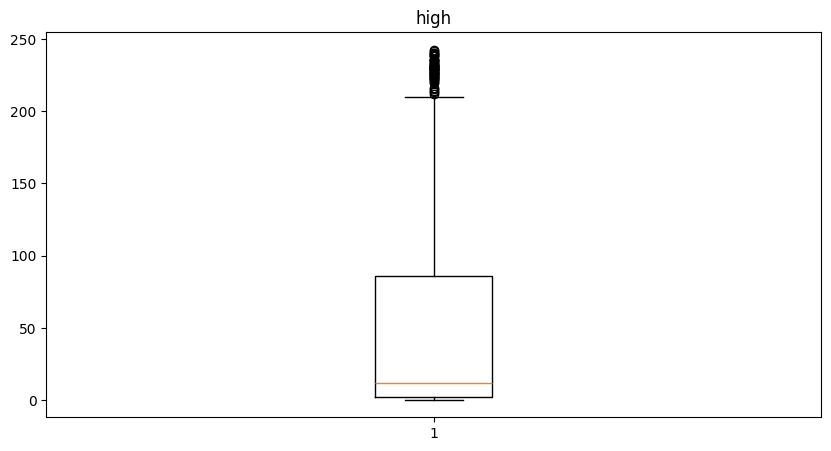

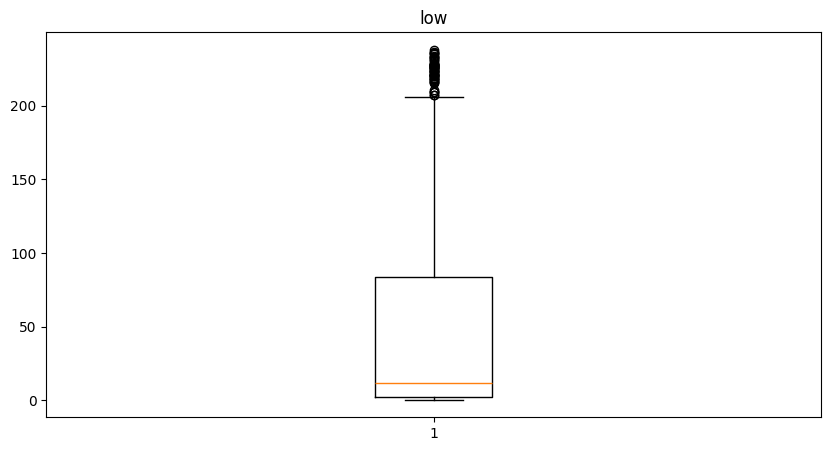

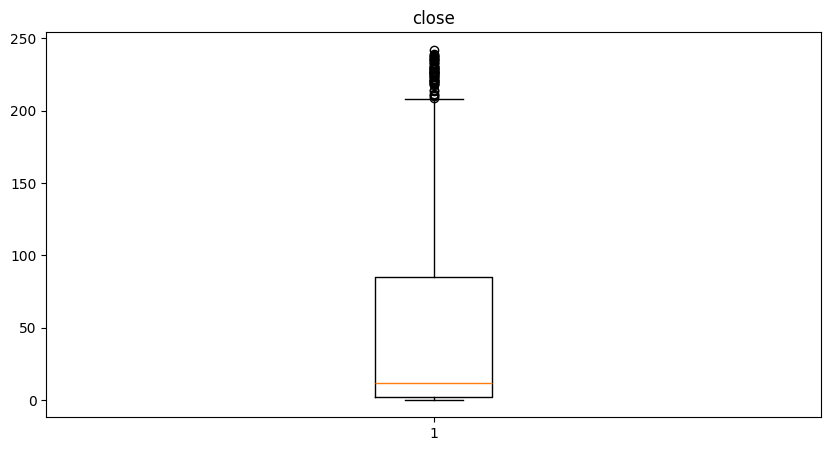

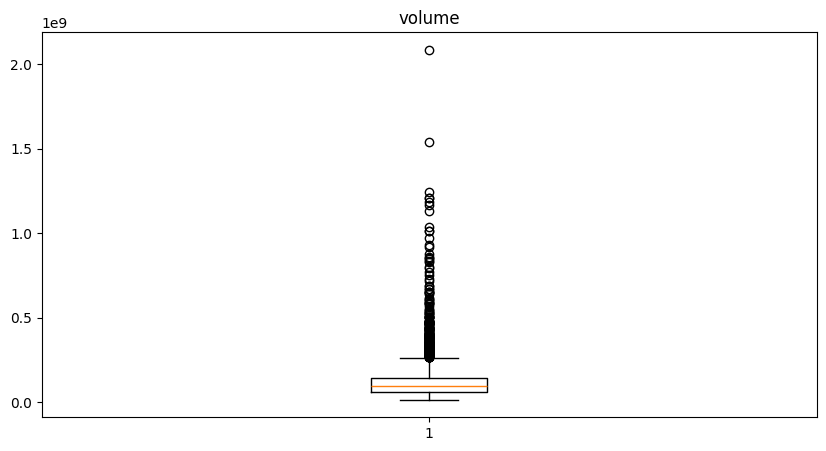

In [189]:
for i in df.columns:
  if i != 'date':
    plt.figure(figsize=(10,5))
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

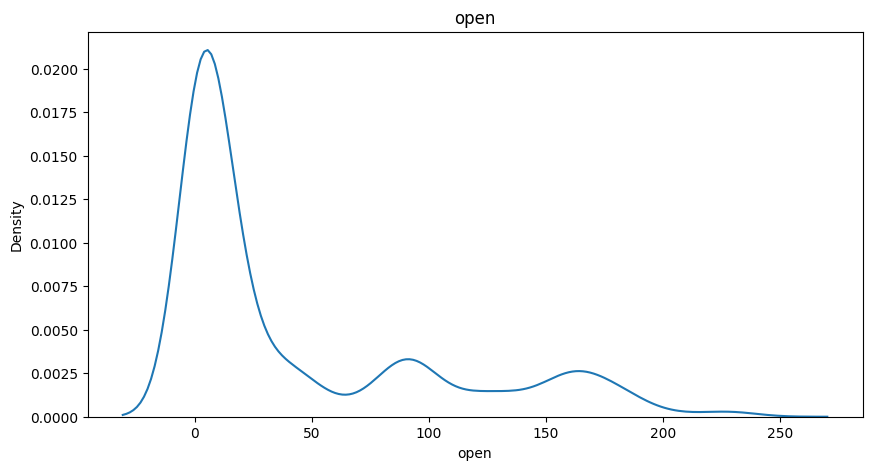

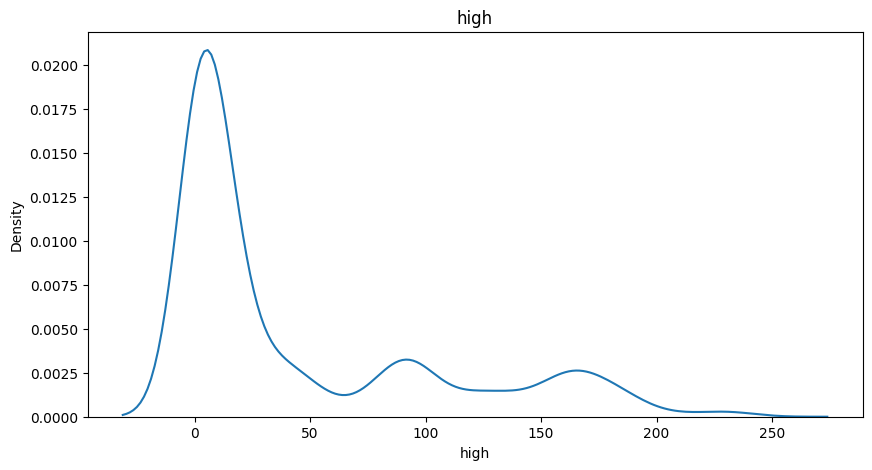

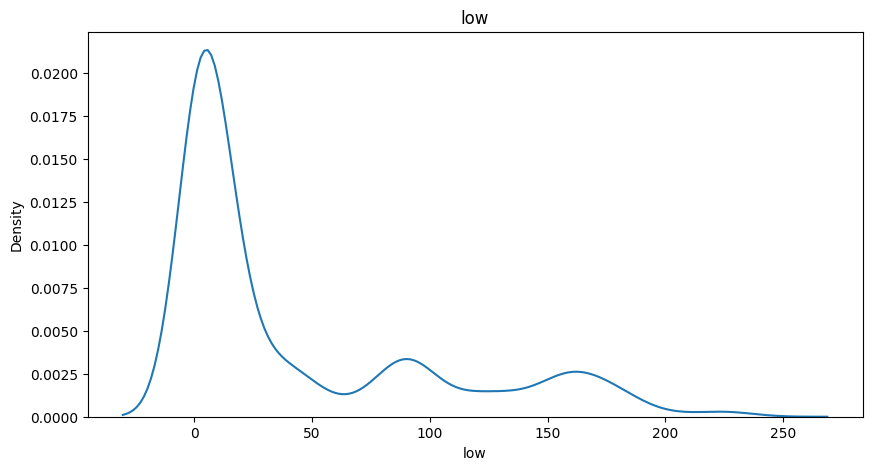

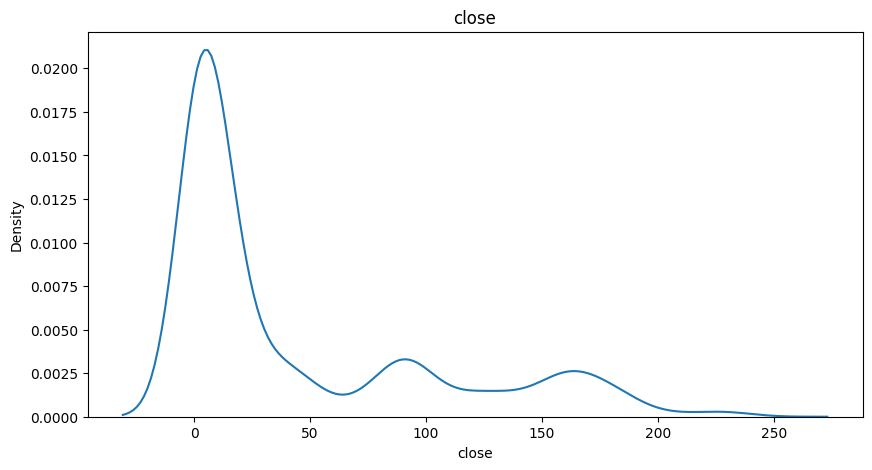

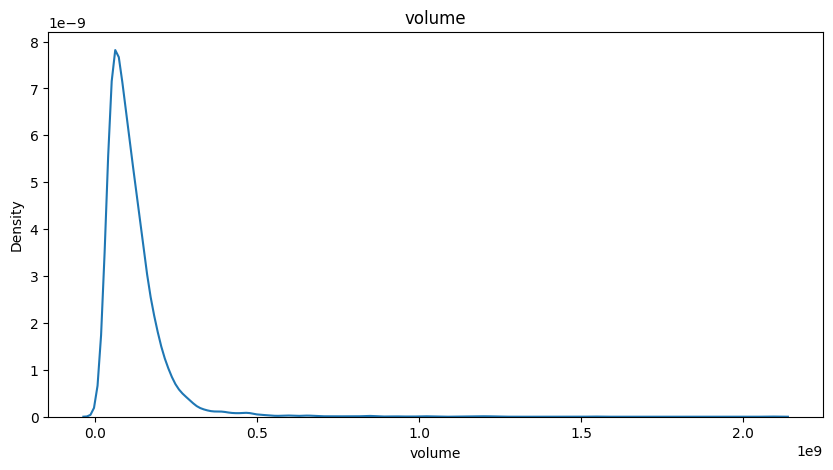

In [190]:
for i in df.columns:
  if i != 'date':
    plt.figure(figsize=(10,5))
    sns.kdeplot(df[i])
    plt.title(i)
    plt.show()

In [191]:
df[df['open'] > 200]

,date,open,high,low,close,volume
6165,2024-07-08 04:00:00,200.039993,201.199997,197.960007,199.289993,34767300
6168,2024-07-11 04:00:00,200.089996,200.270004,192.860001,195.050003,44565000
6251,2024-11-06 05:00:00,200.009995,207.550003,199.139999,207.089996,72292200
6252,2024-11-07 05:00:00,207.440002,212.250000,207.190002,210.050003,52878400
6253,2024-11-08 05:00:00,209.720001,209.960007,207.440002,208.179993,36075800
...,...,...,...,...,...,...
6316,2025-02-12 05:00:00,230.460007,231.179993,228.160004,228.929993,32285200
6317,2025-02-13 05:00:00,228.850006,230.419998,227.520004,230.369995,31346500
6318,2025-02-14 05:00:00,229.199997,229.889999,227.229996,228.679993,27031100
6319,2025-02-18 05:00:00,228.820007,229.300003,223.720001,226.649994,42975100


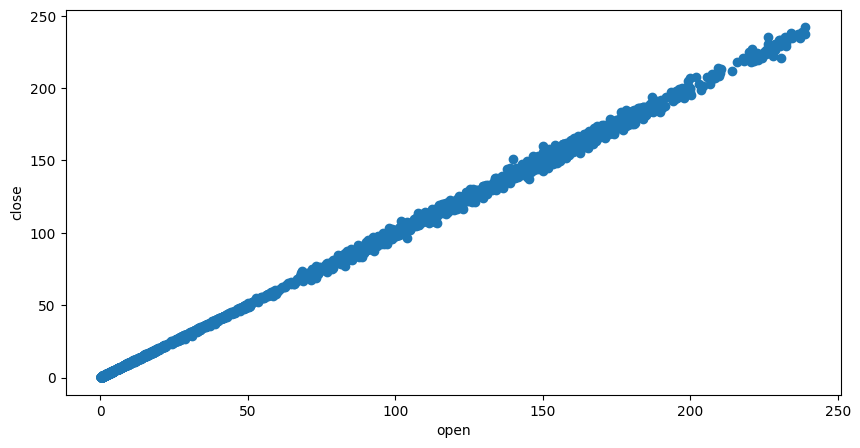

In [192]:
plt.figure(figsize=(10,5))
plt.scatter(df['open'],df['close'])
plt.xlabel('open')
plt.ylabel('close')
plt.show()

In [193]:
# it has a normal outliers, there is nothing to worry about

In [194]:
from sklearn.preprocessing import MinMaxScaler#with normalization I get the best result
scaler = MinMaxScaler()

In [195]:
df_scaled = pd.DataFrame(scaler.fit_transform(df[['open','high','low','close','volume']]))

In [196]:
df_scaled.columns = ['open','high','low','close','volume']

In [197]:
df_new = pd.concat([df['date'],df_scaled],axis=1)

In [198]:
df_new.head()

,date,open,high,low,close,volume
0,2000-01-03 05:00:00,0.015832,0.017229,0.015465,0.017249,0.148363
1,2000-01-04 05:00:00,0.016644,0.017629,0.016033,0.015711,0.161587
2,2000-01-05 05:00:00,0.013528,0.014249,0.013142,0.013191,0.364042
3,2000-01-06 05:00:00,0.013698,0.013746,0.012301,0.012325,0.173796
4,2000-01-07 05:00:00,0.012795,0.013294,0.012761,0.013152,0.094180


In [199]:
df_new.describe()

,date,open,high,low,close,volume
count,6321,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,2012-07-26 11:02:22.382534400,0.186158,0.185566,0.184649,0.183780,0.049754
min,2000-01-03 05:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006-04-18 04:00:00,0.008663,0.008713,0.008540,0.008544,0.022761
50%,2012-07-25 04:00:00,0.047362,0.047200,0.046874,0.046726,0.039074
75%,2018-11-02 04:00:00,0.355410,0.352889,0.351739,0.349597,0.061974
max,2025-02-19 05:00:00,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.249571,0.248712,0.247536,0.246368,0.047105


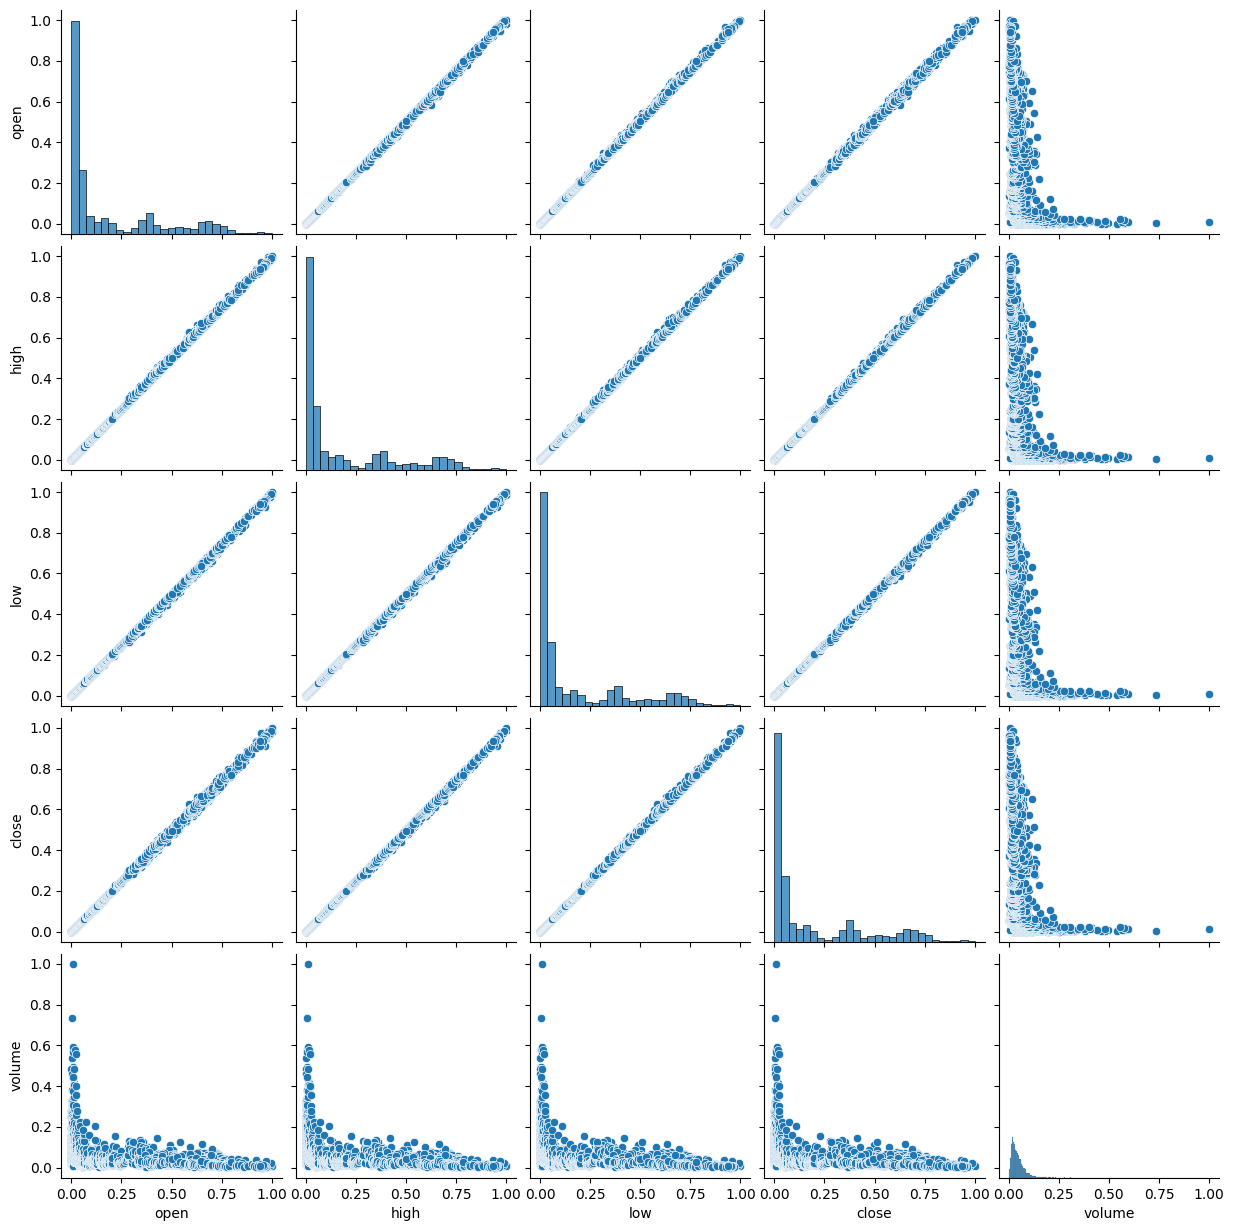

In [200]:
sns.pairplot(df_new)

In [201]:
features = ['open','high','low','close']
target = 'volume'

In [202]:
def create_sequences(data, feature_columns, target_column, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i + sequence_length][feature_columns].values)
        y.append(data.iloc[i + sequence_length][target_column])
    return np.array(X), np.array(y)

# Set sequence length and create sequences
sequence_length = 30 # predict on 30 days period
X, y = create_sequences(df_new, features, target, sequence_length)

In [203]:
train_index = df_new.loc['2000':'2021'].shape[0] - sequence_length
X_train, X_val = X[:train_index], X[train_index:]
y_train, y_val = y[:train_index], y[train_index:]

In [204]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [205]:
model = Sequential([
    LSTM(8, return_sequences=True, input_shape=(sequence_length, len(features))),
    LSTM(16, return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(16, return_sequences=True),
    LSTM(8, return_sequences=False),
    Dense(1) # Add this to specify output shape for the volume prediction
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [206]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=200,
    callbacks=[es],
    verbose=1
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - loss: 0.0028 - val_loss: 7.7565e-05
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0020 - val_loss: 1.8283e-04
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - loss: 0.0017 - val_loss: 6.3523e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0019 - val_loss: 5.4414e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - loss: 0.0019 - val_loss: 1.0236e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0018 - val_loss: 2.1904e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - loss: 0.0016 - val_loss: 9.7015e-05
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 0.0019 - val_loss: 2.6566e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.0015 - val_loss: 1.4806e-04
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - loss: 0.0016 - val_loss: 7.3135e-05
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0017 - val_loss: 6.2248

In [207]:
# Evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_val)

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)


# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
Mean Absolute Error (MAE): 0.005517329418792626
Mean Squared Error (MSE): 5.848417219654803e-05
Root Mean Squared Error (RMSE): 0.0076474945045124434


In [208]:
#Try other models

In [209]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

In [210]:
XT, XS, yT, yS = train_test_split(df_new[features], df_new[target], test_size=0.2, random_state=42)

In [211]:

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(XT)

# Create and fit the Linear Regression model
model_poly = LinearRegression()
model_poly.fit(X_poly, yT)

y_pred_poly = model_poly.predict(poly.transform(XS)) # Transform the test data and predict
mae_poly = mean_absolute_error(yS, y_pred_poly)
mse_poly = mean_squared_error(yS, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

In [212]:
print(mae_poly)
print(mse_poly)
print(rmse_poly)

0.023155301079002117
0.0013096335388302117
0.0361888593192741


In [213]:

# Using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(XT, yT)
y_pred_rf = rf_model.predict(XS)

mae_rf = mean_absolute_error(yS, y_pred_rf)
mse_rf = mean_squared_error(yS, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(mae_rf)
print(mse_rf)
print(rmse_rf)

0.019005794061431946
0.0011206911343139897
0.03347672526269542


In [214]:
#We conclude in the last that the performace of NN is the best with small error in each of MAE,MSE and RMSE